# Dependencies

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [4]:
model = models.Sequential([
    layers.Input(shape=(100, 100, 1)),  # Assuming squares are 100x100 grayscale
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
train_gen = train_datagen.flow_from_directory(
    'dataset_OD/',
    target_size=(100, 100),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    'dataset_OD/',
    target_size=(100, 100),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 410 images belonging to 2 classes.
Found 102 images belonging to 2 classes.


In [7]:
history = model.fit(train_gen, validation_data=val_gen, epochs=10)

/home/soham/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-04-28 22:56:27.540181: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 39337984 exceeds 10% of free system memory.
2025-04-28 22:56:27.634900: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18096128 exceeds 10% of free system memory.
2025-04-28 22:56:27.713974: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18096128 exceeds 10% of free system memory.


 1/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.3438 - loss: 0.7138

2025-04-28 22:56:27.778411: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25447680 exceeds 10% of free system memory.
2025-04-28 22:56:27.902526: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19668992 exceeds 10% of free system memory.


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.6298 - loss: 0.6424 - val_accuracy: 0.8627 - val_loss: 0.3959
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - accuracy: 0.8967 - loss: 0.3170 - val_accuracy: 0.9020 - val_loss: 0.2854
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.9654 - loss: 0.1220 - val_accuracy: 0.9118 - val_loss: 0.1579
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.9233 - loss: 0.1929 - val_accuracy: 0.9706 - val_loss: 0.0949
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.9589 - loss: 0.1195 - val_accuracy: 0.9902 - val_loss: 0.0600
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - accuracy: 0.9933 - loss: 0.0432 - val_accuracy: 1.0000 - val_loss: 0.0224
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.9987 - loss: 0.0176 - val_accuracy: 0.9902 - val_loss: 0.0251
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.9990 - loss: 0.0159 - val_accuracy: 1.0000 - val_

In [9]:
model.save('cnn_model_OD.h5')

In [8]:
import numpy as np
model = tf.keras.models.load_model('cnn_model_OD.h5')

def is_occupied_cnn(square_img):
    resized = cv2.resize(square_img, (100, 100)) / 255.0
    resized = np.expand_dims(resized, axis=(0, -1))  # (1, 100, 100, 1)
    pred = model.predict(resized)
    return pred[0][0] > 0.5  # If probability > 0.5, it's occupied


In [9]:
import cv2
img = cv2.imread("hehe/current_frame.jpg", cv2.IMREAD_GRAYSCALE)

In [10]:
import matplotlib.pyplot as plt

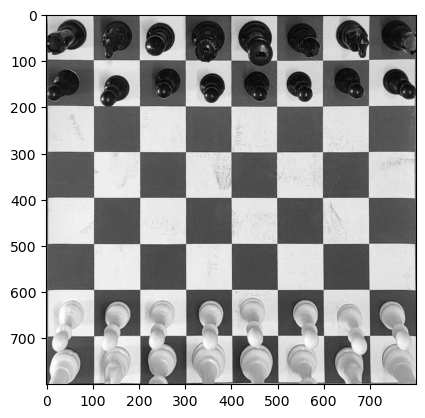

In [11]:
plt.imshow(img, cmap="gray")

In [12]:
box_occupied = img[700:,:100]
is_occupied_cnn(box_occupied)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


True

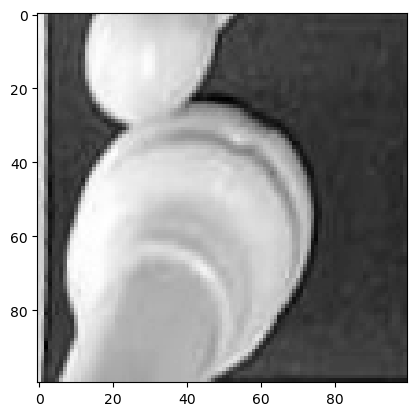

In [13]:
plt.imshow(box_occupied, cmap="gray")

In [14]:
box_unoccupied = img[500:600,:100]
is_occupied_cnn(box_unoccupied)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


True

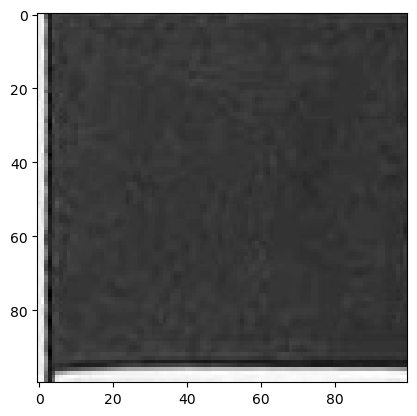

In [15]:
plt.imshow(box_unoccupied, cmap="gray")

In [17]:
print("Occupied ====== 1\nEmpty ====== 0")
print("\nBox\t\tActual\t\tPredicted")

for i in s:
    print(i)

Occupied ====== 1
Empty ====== 0

Box		Actual		Predicted
Box (a0)	Occupied	Occupied
Box (b0)	Occupied	Occupied
Box (c0)	Occupied	Occupied
Box (d0)	Occupied	Occupied
Box (e0)	Occupied	Occupied
Box (f0)	Occupied	Occupied
Box (g0)	Occupied	Occupied
Box (h0)	Occupied	Occupied
Box (a1)	Occupied	Occupied
Box (b1)	Occupied	Occupied
Box (c1)	Occupied	Occupied
Box (d1)	Occupied	Occupied
Box (e1)	Occupied	Occupied
Box (f1)	Occupied	Occupied
Box (g1)	Occupied	Occupied
Box (h1)	Occupied	Occupied
Box (a2)	Empty	Empty
Box (b2)	Empty	Empty
Box (c2)	Empty	Empty
Box (d2)	Empty	Empty
Box (e2)	Empty	Empty
Box (f2)	Empty	Empty
Box (g2)	Empty	Empty
Box (h2)	Empty	Empty
Box (a3)	Empty	Empty
Box (b3)	Empty	Empty
Box (c3)	Empty	Empty
Box (d3)	Empty	Empty
Box (e3)	Empty	Empty
Box (f3)	Empty	Empty
Box (g3)	Empty	Empty
Box (h3)	Empty	Empty
Box (a4)	Empty	Empty
Box (b4)	Empty	Empty
Box (c4)	Empty	Empty
Box (d4)	Empty	Empty
Box (e4)	Empty	Empty
Box (f4)	Empty	Empty
Box (g4)	Empty	Empty
Box (h4)	Empty	Empty
Box (a5

In [16]:
columns = "abcdefgh"
s = []
actuals, preds = [],[]
for i in range(8):
    for j in range(8):
        box = img[i*100:(i+1)*100,j*100:(j+1)*100]
        actual = "Occupied" if (i<2)or(i>5) else "Empty"
        outcome = 1-is_occupied_cnn(box)
        predicted = "Occupied" if outcome==True else "Empty"
        s+=[f"Box ({columns[j]}{i})\t{actual}\t{predicted}"]
        actuals+=[actual]
        preds+=[predicted]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

In [18]:
TP,TN,FP,FN = 0,0,0,0

for i in range(64):
    a = actuals[i]
    p = preds[i]
    # print(a,p)
    TP+= 1 if (a=="Occupied" and p=="Occupied") else 0
    TN+= 1 if (a=="Empty" and p=="Empty") else 0
    FP+= 1 if (a=="Empty" and p=="Occupied") else 0
    FN+= 1 if (a=="Occupied" and p=="Empty") else 0

In [21]:
print(f"Accuracy : {(TP+TN)/64}")
accuracy = (TP+TN)/64

Accuracy : 0.9375


In [22]:
print(f"Precision : {(TP)/(TP+FP)}")
precision = (TP)/(TP+FP)

Precision : 1.0


In [23]:
print(f"Recall : {(TP)/(TP+FN)}")
recall = (TP)/(TP+FN)

Recall : 0.875


In [26]:
print(f"F1-score : {2/((1/precision)+(1/recall))}")
F1 = 2/((1/precision)+(1/recall))

F1-score : 0.9333333333333333


# Visualization

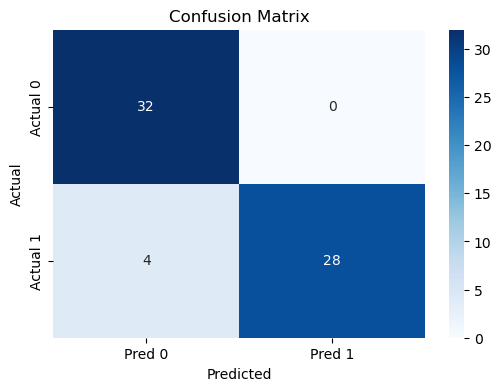

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Build confusion matrix
cm = np.array([[TN, FP],
               [FN, TP]])

# Plot and save
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Pred 0', 'Pred 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save before showing
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')  # or 'confusion_matrix.jpg'
plt.show()

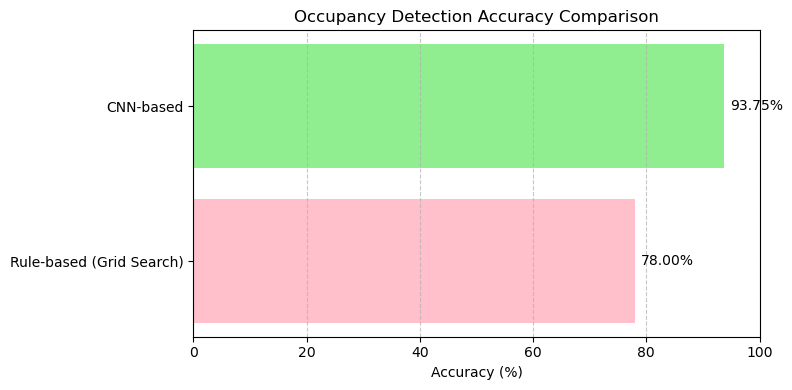

In [37]:
import matplotlib.pyplot as plt

# Data
methods = ['Rule-based (Grid Search)', 'CNN-based']
accuracies = [78, 93.75]

# Plot
plt.figure(figsize=(8, 4))
bars = plt.barh(methods, accuracies, color=['pink', 'lightgreen'])

# Annotate accuracy values on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}%', va='center', fontsize=10)

# Styling
plt.xlabel('Accuracy (%)')
plt.title('Occupancy Detection Accuracy Comparison')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save before showing
plt.savefig('compare_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()